# Clustering Categorical Data

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters.

<b> Already done that? Okay! </b>
    
There are other features: name and continent.

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [16]:
# Mount Google Drive to access files stored there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries for data manipulation, visualization, and clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [ ]:
# Load the dataset from a CSV file located in Google Drive
data = pd.read_csv('/content/Categorical.csv')

data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa







Remove the duplicate index column from the dataset.

In [17]:
# Remove any duplicate index column from the dataset to clean it up
data = data.reset_index(drop=True)

italicized text## Map the data

Use the <i>'continent'</i> category for this analysis.

In [ ]:
# Map the 'continent' column to numerical values for clustering
continent_mapping = {
    'Asia': 0,
    'Africa': 1,
    'Europe': 2,
    'North America': 3,
    'South America': 4,
    'Oceania': 5,
    'Antarctica': 6,
    'Seven seas (open ocean)': 7,
}


# Create a copy of the data and apply the mapping to the 'continent' column
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map(continent_mapping).fillna(-1).astype(int)

data_mapped



,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


## Select the features

In [ ]:
# Select the features for clustering, specifically the 'continent' and another feature
x = data_mapped.iloc[:, 1:3]

x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Use 4 clusters initially.

In [ ]:
# Initialize the KMeans clustering algorithm with 4 clusters
kmeans = KMeans(4)

In [ ]:
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [ ]:
# Predict the clusters for each data point
identified_clusters = kmeans.fit_predict(x)

# Display the identified clusters
identified_clusters

array([2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 3, 1, 2, 3, 0, 1, 1, 0, 0, 0,
       3, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 3, 3, 1, 1, 0, 2, 3, 0, 0,
       1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1,
       0, 0, 1, 0, 3, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       3, 2, 3, 1, 2, 0, 2, 0, 3, 0, 1, 3, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       3, 1, 1, 1, 1, 3, 2, 2, 3, 0, 1, 3, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0,
       3, 2, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 3, 0, 3, 3, 1, 0, 2, 1, 1, 3,
       1, 3, 0, 3, 0, 2, 2, 0, 0, 1, 3, 3, 1, 1, 2, 2, 2, 3, 3, 3, 0, 2,
       3, 0, 2, 0, 2, 1, 0, 3, 1, 0, 1, 1, 1, 0, 3, 2, 0, 3, 0, 2, 0, 1,
       1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 3, 1, 1, 3, 2, 2, 0,
       0, 3, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
# Add the cluster information to the original data
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,3,2
1,Afghanistan,66.004734,33.835231,0,1
2,Angola,17.537368,-12.293361,1,1
3,Anguilla,-63.064989,18.223959,3,2
4,Albania,20.049834,41.142450,2,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,0,1
238,South Africa,25.083901,-29.000341,1,1
239,Zambia,27.774759,-13.458242,1,1


## Plot the data

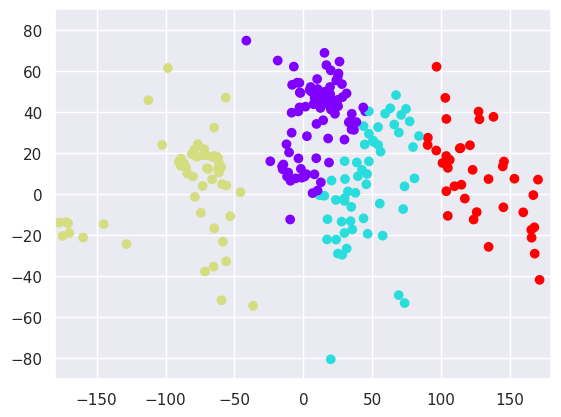

In [ ]:
# Plot the data points with colors representing different clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations.

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.